# Chapter 6: Probability

In [2]:
library(dplyr)
library(reshape2)
library(tidyr)
library(ggplot2)
library(knitr)
library(readr)
library(cowplot)
library(janitor)
# load the NHANES data library
library(NHANES)
theme_set(theme_minimal(base_size = 14))


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




## Figure 6.1

Rows: 19 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): pctResp, Jones, Moore

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


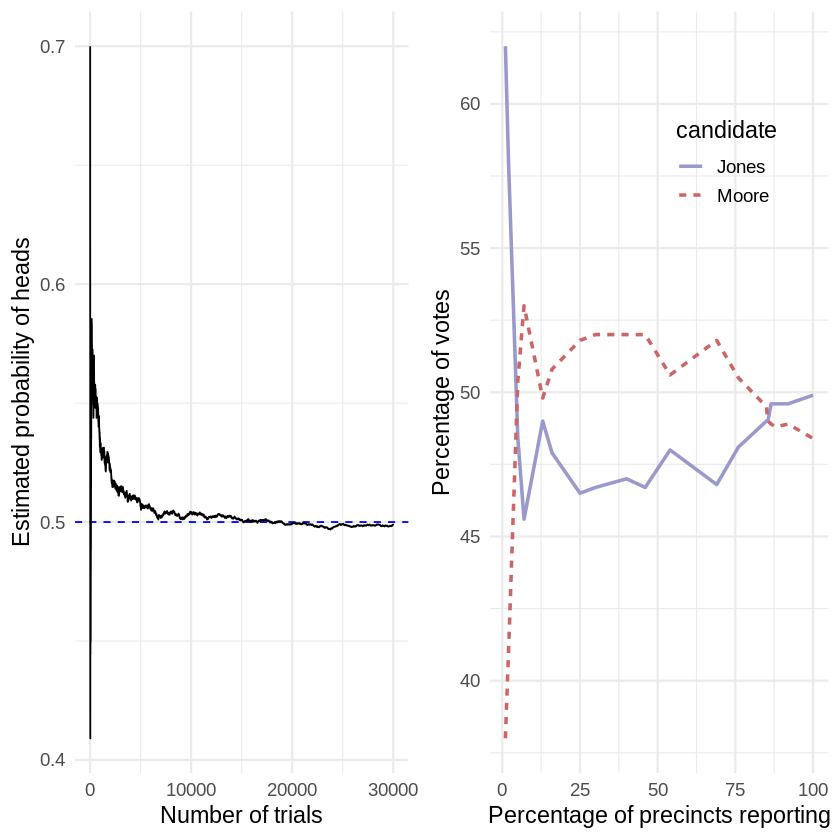

In [4]:
set.seed(12345) # set the seed so that the outcome is consistent
nsamples <- 30000 # how many flips do we want to make?
# create some random coin flips using the rbinom() function with
# a true probability of 0.5

sampDf <-
  tibble(
    trial_number = seq(nsamples),
    outcomes = rbinom(nsamples, 1, 0.5)
  ) %>%
  mutate(mean_probability = cumsum(outcomes) / seq_along(outcomes))

p1 <- sampDf %>%
  slice(10:nsamples) %>% # start with a minimum sample of 10 flips
  ggplot(aes(x = trial_number, y = mean_probability)) +
  geom_hline(yintercept = 0.5, color = "blue", linetype = "dashed") +
  geom_line() +
  labs(
    x = "Number of trials",
    y = "Estimated probability of heads"
  )

electionReturns <-
  read_csv(
    "https://raw.githubusercontent.com/statsthinking21/statsthinking21-figures-data/main/03/alabama_election_returns.csv"
  ) %>%
  gather(candidate, pctVotes, -pctResp)

p2 <- electionReturns %>%
  ggplot(aes(pctResp, pctVotes, color = candidate)) +
  geom_line(aes(linetype=candidate),size = 1) +
  scale_color_manual(values = c("#9999CC", "#CC6666")) +
  labs(
    x = "Percentage of precincts reporting",
    y = "Percentage of votes"
  ) +
  theme(legend.position = c(.7,0.8))
plot_grid(p1, p2)

## Figure 6.2

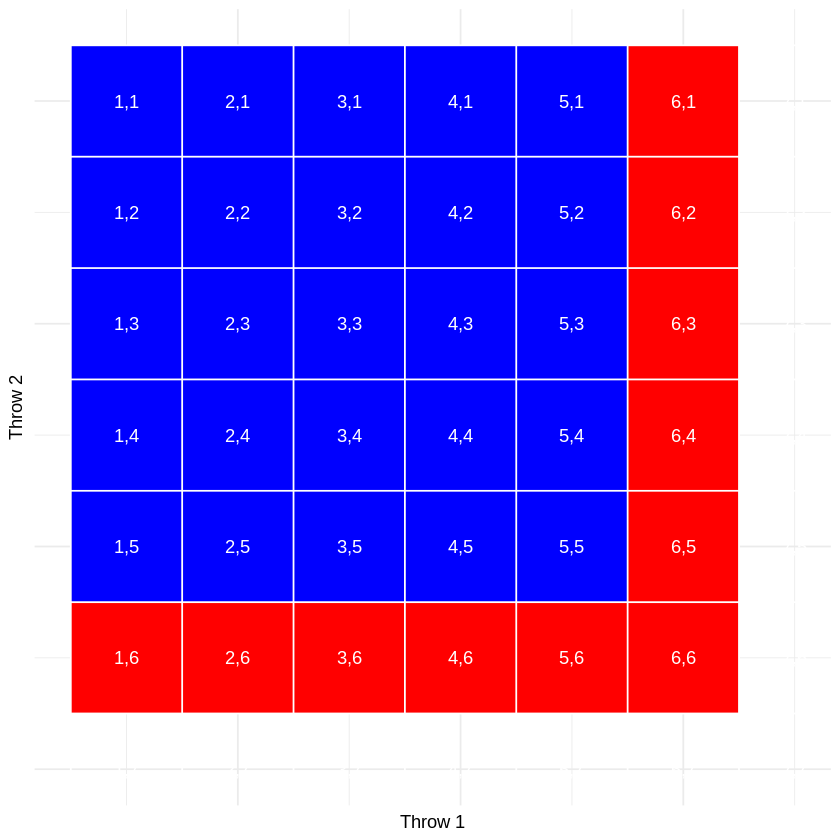

In [5]:
imgmtx <-
  matrix(0, nrow = 6, ncol = 6)

imgmtx[, 1] <- 1
imgmtx[6, ] <- 1

plot <-
  imgmtx %>%
  melt() %>%
  ggplot(aes(Var1, Var2, fill = value)) +
  scale_fill_gradientn(colours=c("#0000FFFF","#FFFFFFFF","#FF0000FF")) +
  geom_raster(interpolate = FALSE)

for (i in seq(0.5, 6.5)) {
  plot <-
    plot + geom_hline(yintercept = i, color = "white")
  plot <-
    plot + geom_vline(xintercept = i, color = "white")
  for (j in seq(0.5, 6.5)) {
    plot <-
      plot + annotate(
        "text",
        x = i + 0.5, y = 6.5 - j, # j + 0.5,
        label = sprintf("%d,%d", i + 0.5, j + 0.5),
        color = "white")
  }
}

plot +
  theme_minimal() +
  theme(
    axis.line = element_blank(),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks = element_blank(),
    legend.position = "none"
  ) +
  labs(
    x = "Throw 1",
    y = "Throw 2"
  )

## Table 6.1

In [6]:
# compute cumulative probability distribution for Curry's free throws

curry_df <- tibble(
  numSuccesses = seq(0, 4)
) %>%
  mutate(
    Probability = dbinom(numSuccesses, size = 4, prob = 0.91),
    CumulativeProbability = pbinom(numSuccesses, size = 4, prob = 0.91)
  )

kable(curry_df, caption='Simple and cumulative probability distributions for number of successful free throws by Steph Curry in 4 attempts.', digits=4)



Table: Simple and cumulative probability distributions for number of successful free throws by Steph Curry in 4 attempts.

| numSuccesses| Probability| CumulativeProbability|
|------------:|-----------:|---------------------:|
|            0|      0.0001|                0.0001|
|            1|      0.0027|                0.0027|
|            2|      0.0402|                0.0430|
|            3|      0.2713|                0.3143|
|            4|      0.6857|                1.0000|

## Table 6.2

In [7]:
# Summarize NHANES data for diabetes and physical activity

# drop duplicated IDs within the NHANES dataset
NHANES_diabetes_activity <-
  NHANES %>%
  distinct(ID, .keep_all = TRUE) %>%
  drop_na(PhysActive, Diabetes)

diabetes_summary <- NHANES_diabetes_activity %>%
  count(Diabetes) %>%
  mutate(
    prob = n / sum(n)
  )

physactive_summary <- NHANES_diabetes_activity %>%
  count(PhysActive) %>%
  mutate(
    prob = n / sum(n)
  )

all_summary <- data.frame(Answer=diabetes_summary$Diabetes,
                          N_diabetes=diabetes_summary$n,
                          P_diabetes=diabetes_summary$prob,
                          N_PhysActive=physactive_summary$n,
                          P_PhysActive=physactive_summary$prob)

kable(all_summary, caption='Summary data for diabetes and physical activity')



Table: Summary data for diabetes and physical activity

|Answer | N_diabetes| P_diabetes| N_PhysActive| P_PhysActive|
|:------|----------:|----------:|------------:|------------:|
|No     |       4893|  0.8989528|         2472|    0.4541613|
|Yes    |        550|  0.1010472|         2971|    0.5458387|

## Table 6.3

In [8]:
# compute joint probabilities for diabetes and physical activity

NHANES_diabetes_stats_by_activity <-
  NHANES_diabetes_activity %>%
  count(Diabetes, PhysActive) %>%
  mutate(
    prob = n / sum(n)
  )

kable(NHANES_diabetes_stats_by_activity, caption='Joint probabilities for Diabetes and PhysActive variables.')



Table: Joint probabilities for Diabetes and PhysActive variables.

|Diabetes |PhysActive |    n|      prob|
|:--------|:----------|----:|---------:|
|No       |No         | 2123| 0.3900423|
|No       |Yes        | 2770| 0.5089105|
|Yes      |No         |  349| 0.0641191|
|Yes      |Yes        |  201| 0.0369282|

## Table 6.4

In [9]:
# compute probabilities for mental health and physical activity
NHANES_adult <-
  NHANES %>%
  dplyr::filter(
    Age >= 18,
    !is.na(PhysActive),
    !is.na(DaysMentHlthBad)
  ) %>%
  mutate(badMentalHealth = DaysMentHlthBad > 7,
         badMentalHealth = case_when(
      badMentalHealth == TRUE ~ "Bad Mental Health",
      badMentalHealth == FALSE ~ "Good Mental Health"
    ))

NHANES_mentalhealth_by_physactive_counts <- NHANES_adult %>% tabyl(PhysActive, badMentalHealth) %>% adorn_totals(c("row", "col"))

# kable(NHANES_mentalhealth_by_physactive_counts, caption='Counts for each combination of mental vs. physical health in the NHANES dataset.')

total_n <- NHANES_mentalhealth_by_physactive_counts[3,4]
# there doesn't seem to be a simple way to do this in R
NHANES_mentalhealth_by_physactive_p <- NHANES_mentalhealth_by_physactive_counts[,2:4]/NHANES_mentalhealth_by_physactive_counts[3,4]
NHANES_mentalhealth_by_physactive_p <- NHANES_mentalhealth_by_physactive_p %>%
  mutate(PhysActive=NHANES_mentalhealth_by_physactive_counts[,1])
NHANES_mentalhealth_by_physactive_p <- NHANES_mentalhealth_by_physactive_p[, c('PhysActive', "Bad Mental Health", "Good Mental Health", "Total" )]
kable(NHANES_mentalhealth_by_physactive_p, caption='Proportional results for analysis of mental vs. physical health.')



Table: Proportional results for analysis of mental vs. physical health.

|PhysActive | Bad Mental Health| Good Mental Health|     Total|
|:----------|-----------------:|------------------:|---------:|
|No         |         0.0938106|          0.3743475| 0.4681581|
|Yes        |         0.0702461|          0.4615958| 0.5318419|
|Total      |         0.1640567|          0.8359433| 1.0000000|

## Table 6.5

In [10]:
total_n <- NHANES_mentalhealth_by_physactive_counts[3,4]
# there doesn't seem to be a simple way to do this in R
NHANES_mentalhealth_by_physactive_condp <- NHANES_mentalhealth_by_physactive_counts

for (i in 1:3){
  NHANES_mentalhealth_by_physactive_condp[i, 2:4] <- NHANES_mentalhealth_by_physactive_condp[i, 2:4] / NHANES_mentalhealth_by_physactive_condp[i, 4]

}

kable(NHANES_mentalhealth_by_physactive_condp, caption='Conditional probabilities for mental health given physical health.')



Table: Conditional probabilities for mental health given physical health.

|PhysActive | Bad Mental Health| Good Mental Health| Total|
|:----------|-----------------:|------------------:|-----:|
|No         |         0.2003823|          0.7996177|     1|
|Yes        |         0.1320808|          0.8679192|     1|
|Total      |         0.1640567|          0.8359433|     1|